# Data Loading/Cleaning


Importing relevant packages into the python environment

In [23]:
# import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [6]:
df = pd.read_csv("data/star_classification.csv")
df = df.replace(to_replace=-9999.0, value = np.nan)

Removed some missing/incorrect

In [14]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Object Labels: 

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object (QSO))

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# Variable Analysis: 

Within this dataset there are a handful of key variables that we can identify as critical to our ability to classify the types of stellar objects.

Namely: <i> Wavelengthss, RA/Dec Coordinates, and Redshift </i>

<b> Wavelengthss </b>

The letters <i> u, g, r, i, z </i> describe the specific slice of wavelengths that each object had it's apparent magnitude measured in by the SDSS telescope. Where: 

u- 355.1 nm (Ultraviolet)

g- 468.6 nm (Green)

r- 616.5 nm (Red)

i- 748.1 nm (Near Infrared)

z- 893.1 nm (Infrared)

These wavelengths are measured as apparent magnitudes, which operates with an inverse relationship with brightness. An object with a low apparent magnitude is much brighter than an object with a high magnitude. 

Some reference points on this apparent scale are: 

Sun = -26 

Full Moon = -12

Polaris = 2.5

<b> Right Ascension and Declination </b>

In the dataset labelled as alpha\delta, this coordinate system maps the celestial sphere around the Earth and can be visualized here: 

![Coordinate System](images/celestial-sphere.jpg)

<b> Redshift </b>

How far an object is away from us, or distance from observer. 


# Initial Visuals

<Axes: xlabel='class', ylabel='Count'>

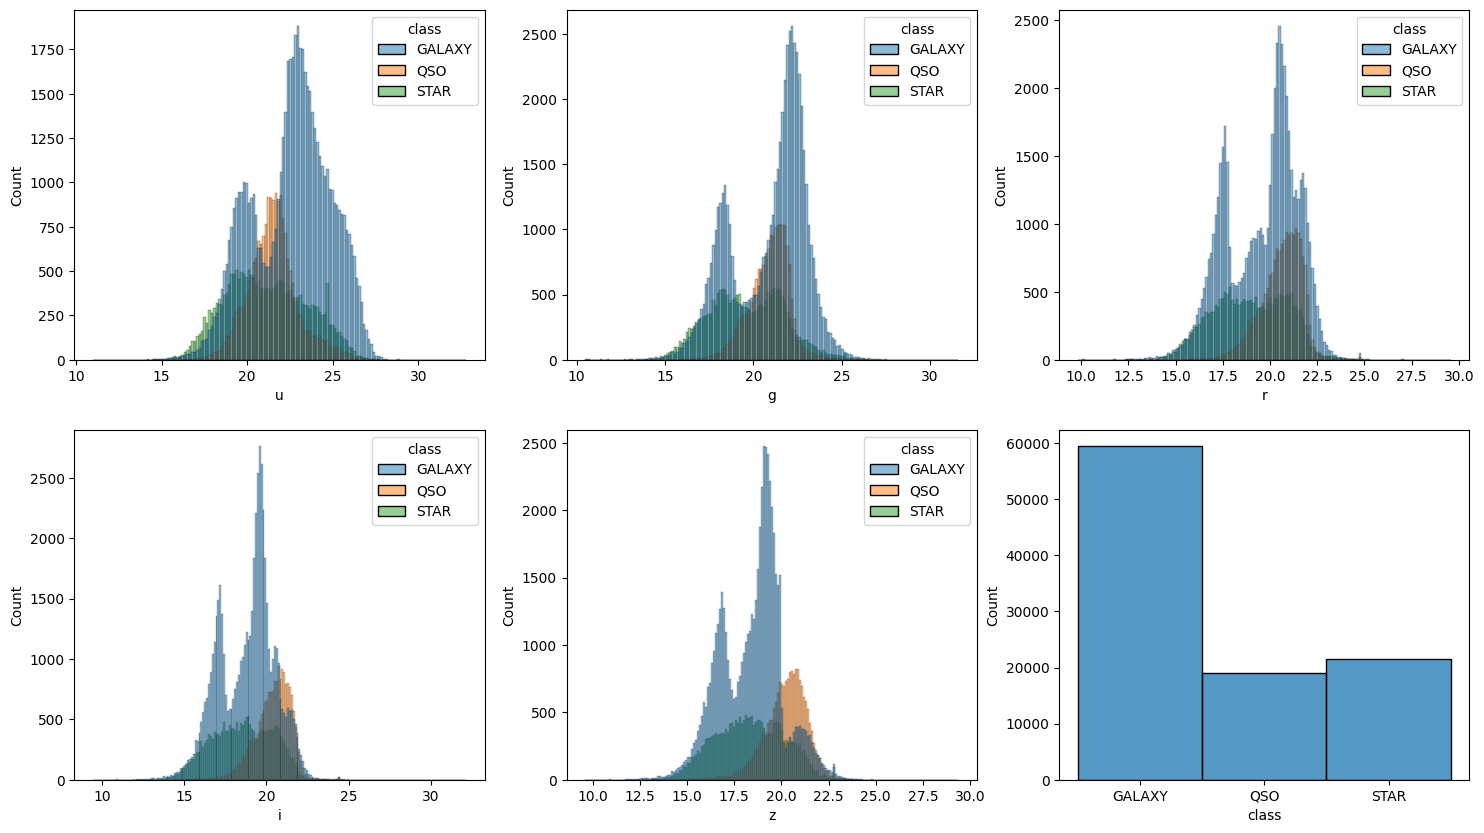

In [57]:
fig, axis = plt.subplots(2,3, figsize = (18,10))
sns.histplot(df, x = "u", hue= "class", ax= axis[0,0])
sns.histplot(df, x = "g", hue= "class", ax= axis[0,1])
sns.histplot(df, x = "r", hue= "class", ax= axis[0,2])
sns.histplot(df, x = "i", hue= "class", ax= axis[1,0])
sns.histplot(df, x = "z", hue= "class", ax= axis[1,1])
sns.histplot(df, x = "class", ax = axis[1,2])


We can see from the following plots that there is a large sample bias towards Galaxy classified objects, which might indicate that for a further analysis we might have to employ methods like undersampling to accurately build models on this set. 

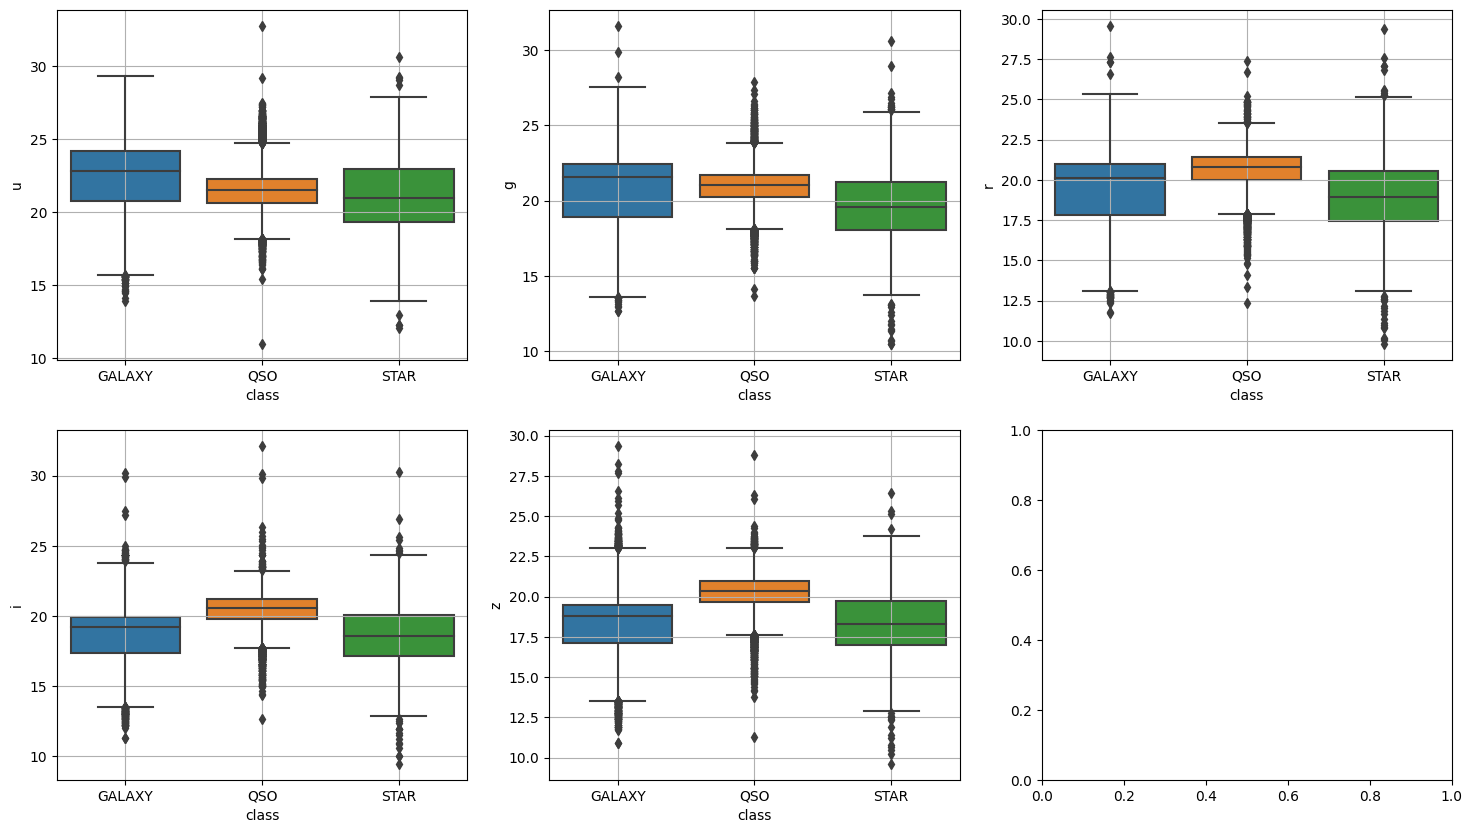

In [75]:
fig, axis = plt.subplots(2,3, figsize = (18,10))
sns.boxplot(df, x = "class", y = "u", ax= axis[0,0]).grid()
sns.boxplot(df, x = "class", y = "g", ax= axis[0,1]).grid()
sns.boxplot(df, x = "class", y = "r", ax= axis[0,2]).grid()
sns.boxplot(df, x = "class", y = "i", ax= axis[1,0]).grid()
sns.boxplot(df, x = "class", y = "z", ax= axis[1,1]).grid()

The box plots provide us some insight into the average magnitude within each wavelength for the stellar objects.

We can also analyze some of the correlations between each variable as follows;

<Axes: >

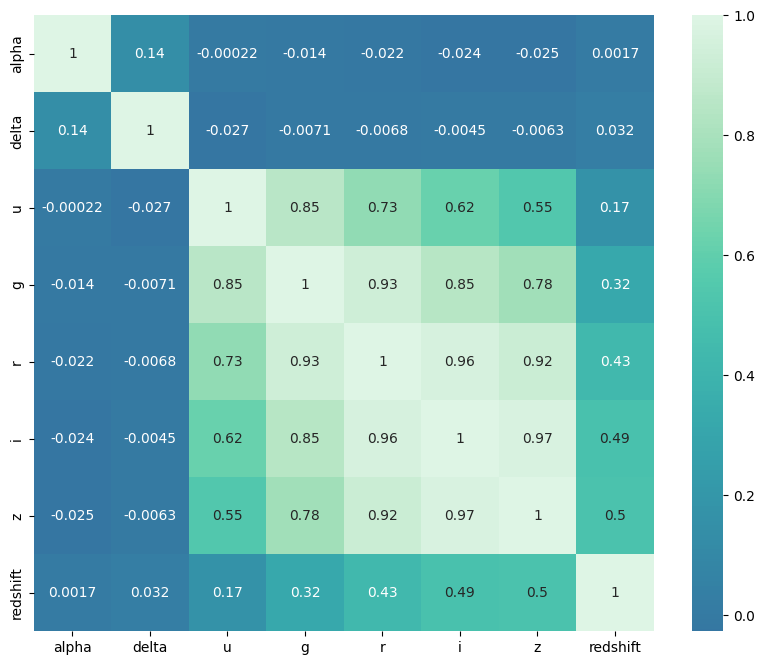

In [74]:
new_df = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].copy()
new_df.head()
cor = new_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data = cor, annot = True, cmap = 'mako', center = 0)

Althought intuitive, we can see that the existance of each wavelength correlation to nearby wavelengths nearby on the electro-magnetic spectrum. That is, an object that has a high/low apparant magnitude in Z probably has a stronger correlation in I, compared to U being significantly further away on the EM-spectrum.

<Axes: xlabel='redshift', ylabel='r'>

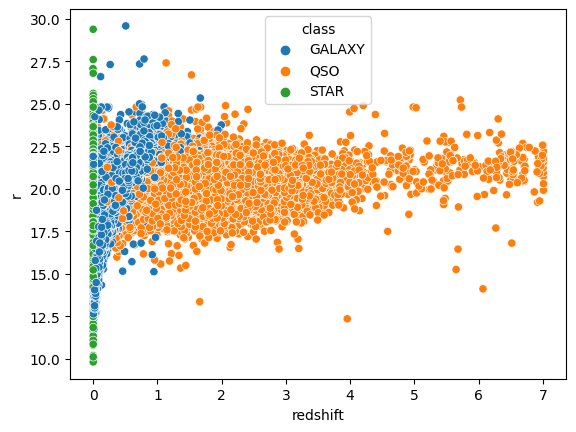

In [59]:
sns.scatterplot(df, y = "r", x = "redshift", hue = "class").facet()

<Axes: xlabel='u', ylabel='redshift'>

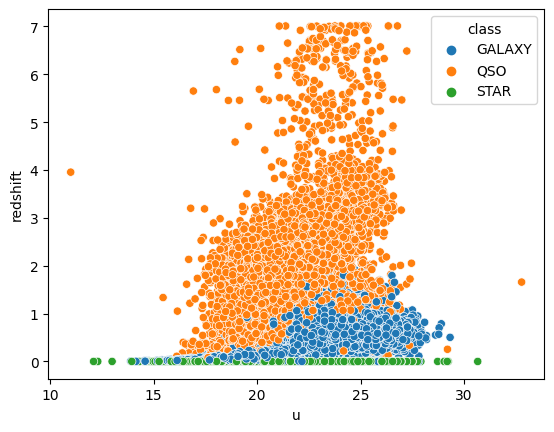

In [49]:
sns.scatterplot(df, y = "redshift", x = "u", hue = "class")

<Axes: xlabel='u', ylabel='r'>

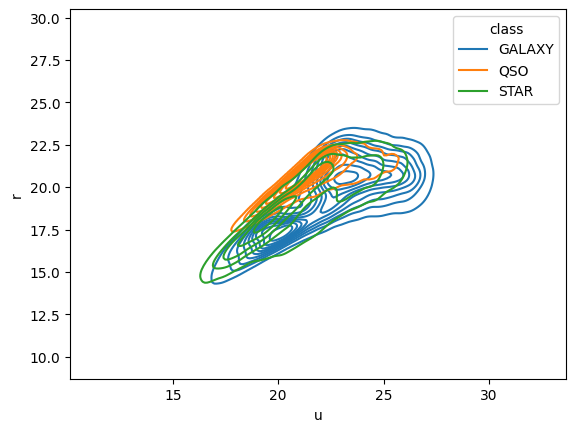

In [56]:
sns.kdeplot(data = df, x = "u", y = "r", hue = "class")

In [20]:
select_df = df[['u','g','r','i','z','obj_ID', 'class']]
bar_df = select_df.T
bar_df

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
u,23.87882,24.77759,25.26307,22.13682,19.43718,23.48827,21.46973,22.24979,24.40286,21.74669,...,23.79655,26.22899,25.82234,23.13172,20.96526,22.16759,22.69118,21.16916,25.35039,22.62171
g,22.2753,22.83188,22.66389,23.77656,17.58028,23.33776,21.17624,22.02172,22.35669,20.03493,...,22.41332,21.8482,24.02722,23.18506,19.81625,22.97586,22.38628,19.26997,21.63757,21.79745
r,20.39501,22.58444,20.60976,21.61162,16.49747,21.32195,20.92829,20.34126,20.61032,19.17553,...,20.36012,20.47138,21.43137,21.52854,19.34186,21.90404,20.45003,18.20428,19.91386,20.60115
i,19.16573,21.16812,19.34857,20.50454,15.97711,20.25615,20.60826,19.48794,19.4649,18.81823,...,19.33964,19.60049,20.13085,20.26975,19.14711,21.30548,19.75759,17.69034,19.07254,20.00959
z,18.79371,21.61427,18.94827,19.2501,15.54461,19.54544,20.42573,18.84999,18.95852,18.65422,...,18.74413,18.94726,19.66464,20.11383,19.0579,20.73569,19.41526,17.35221,18.62482,19.28075
obj_ID,1237660961327743232.0,1237664879951151104.0,1237660961330430208.0,1237663478724297984.0,1237680272041378048.0,1237680272039609088.0,1237678858481565952.0,1237678858473963520.0,1237661435386659840.0,1237670961088167936.0,...,1237665096853160448.0,1237665096854537216.0,1237667537461641216.0,1237652948525974272.0,1237663456702759936.0,1237678879964201472.0,1237679476408647936.0,1237668298220634368.0,1237661151383454208.0,1237661151378801152.0
class,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,QSO,QSO,GALAXY,GALAXY,STAR,...,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY


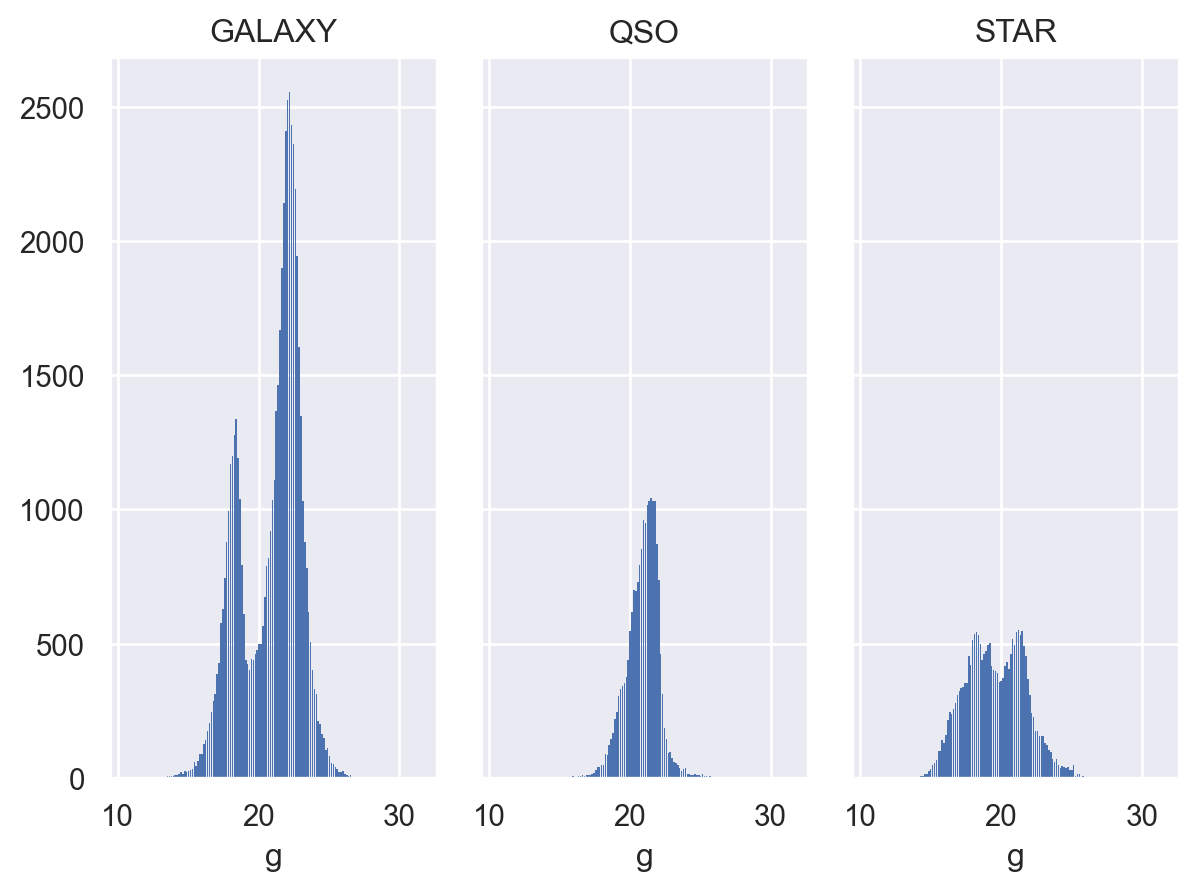

In [45]:
p = so.Plot(df, x = "g").add(so.Bar(), so.Hist()).facet("class")
p